# Exploratary Data Analysis



### Roles To Explore:

In [85]:
#Importing libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datasets import load_dataset
import ast

#Loading Dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#df['job_posted_date'].dtype  -------------> dtype('<M8[ns]')
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)
#type(df['job_skills'][1])    -------------> List


### Filter For US Data Analyst Roles

In [86]:
df_us_da = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [87]:
df_us_da.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
138193,Data Analyst,Power Platform Data Analyst,"Charlotte, NC",via Ladders,Full-time,False,Georgia,2023-03-30 08:28:37,False,False,United States,year,150000.0,NaN,TIAA,None,None
503433,Data Analyst,Remote - Data Analyst - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,Georgia,2023-02-21 12:32:53,False,False,United States,year,79000.0,NaN,Apex Systems,"[sql, python, c++, c#]","{'programming': ['sql', 'python', 'c++', 'c#']}"
213198,Data Analyst,"Data Analyst, Geospatial","Jacksonville, FL",via DataAnalyst.com,Full-time,False,Georgia,2023-10-25 23:33:23,True,False,United States,None,NaN,NaN,Arcadis,None,None
778513,Data Analyst,Business Data Analyst,"Boston, MA",via LinkedIn,Contractor,False,"New York, United States",2023-01-20 05:16:52,True,False,United States,None,NaN,NaN,Emonics LLC,"[go, sql, tableau, jira]","{'analyst_tools': ['tableau'], 'async': ['jira..."
730110,Data Analyst,Data Analyst,"McLean, VA",via LinkedIn,Contractor,False,"New York, United States",2023-04-21 21:00:32,True,False,United States,None,NaN,NaN,TekWissen ®,"[sql, python, redshift, snowflake, aws, databr...","{'analyst_tools': ['tableau'], 'cloud': ['reds..."
547516,Data Analyst,Data and Evaluation Analyst II - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"California, United States",2023-08-17 19:01:48,False,True,United States,None,NaN,NaN,Get.It Recruit - Administrative,"[python, r, excel, sap, word, powerpoint, outl...","{'analyst_tools': ['excel', 'sap', 'word', 'po..."
517989,Data Analyst,Data Science Analyst,"New York, NY",via LinkedIn,Full-time,False,"New York, United States",2023-02-09 11:00:05,False,True,United States,None,NaN,NaN,Federal Reserve Bank of New York,None,None
444233,Data Analyst,Data Analyst,"Grapevine, TX",via Trabajo.org,Full-time,False,"Texas, United States",2023-01-28 16:01:51,False,False,United States,None,NaN,NaN,Kubota Tractor Corporation,"[sql, oracle, excel]","{'analyst_tools': ['excel'], 'cloud': ['oracle..."
107549,Data Analyst,Data analyst,"Fort Worth, TX",via Talent.com,Full-time,False,"Texas, United States",2023-07-25 00:01:56,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",None,None
426214,Data Analyst,Health Data Analyst,"Fairfield, CA",via Dice,Contractor,False,"California, United States",2023-11-02 16:01:00,True,True,United States,hour,NaN,40.0,SBC Solutions,None,None


In [88]:
df_us_da['job_location'].value_counts().head(10)  #-------------> pandas's Series

job_location
Anywhere           5106
New York, NY       3035
Atlanta, GA        2741
Chicago, IL        2337
Austin, TX         1919
Dallas, TX         1862
Washington, DC     1592
Charlotte, NC      1433
Tampa, FL          1431
Los Angeles, CA    1328
Name: count, dtype: int64

In [89]:
df_plot = df_us_da['job_location'].value_counts().head(10).to_frame() #-------------> pandas's DataFrame

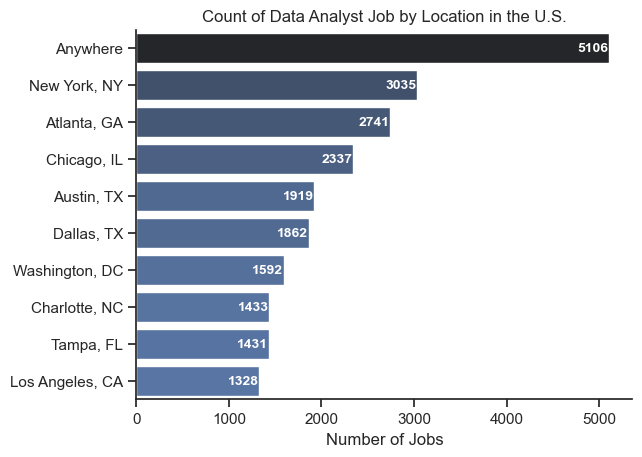

In [90]:
fig ,ax = plt.subplots()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='count'  , y= 'job_location' , hue = 'count', palette='dark:b_r', legend='')
sns.despine() #-------------> removes top n right border around the plot
plt.title('Count of Data Analyst Job by Location in the U.S.')
plt.xlabel('Number of Jobs')
plt.ylabel('')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',  # Text to annotate
                (p.get_width() - 5, p.get_y() + p.get_height() / 2),  # Position (adjusted slightly)
                ha='right', va='center', color='white', fontsize=10, fontweight='bold')
    

plt.show()


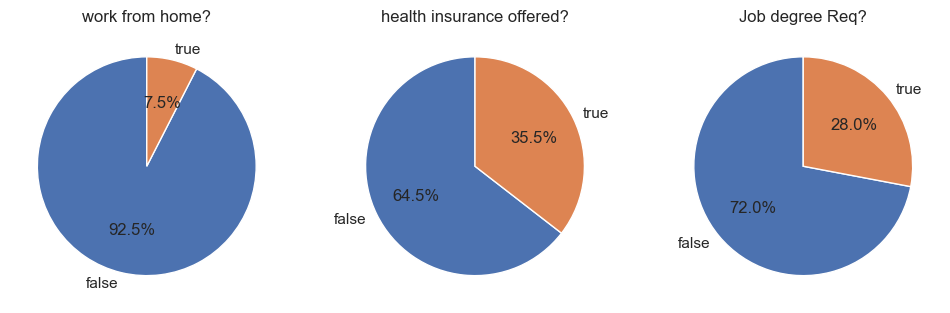

In [91]:
fig , ax = plt.subplots(1,3)

dict_col = {
    'job_work_from_home': 'work from home?',
    'job_health_insurance':'health insurance offered?',
    'job_no_degree_mention':'Job degree Req?'
}

for  i, (col, title)  in enumerate(dict_col.items()):
    ax[i].pie(df_us_da[col].value_counts(), startangle= 90, autopct = '%1.1f%%',labels=['false','true'])
    ax[i].set_title(title)

fig.set_size_inches((12,5))

plt.show()

In [92]:
df_plot = df_us_da['company_name'].value_counts().head(10).to_frame() #-------------> pandas's DataFrame

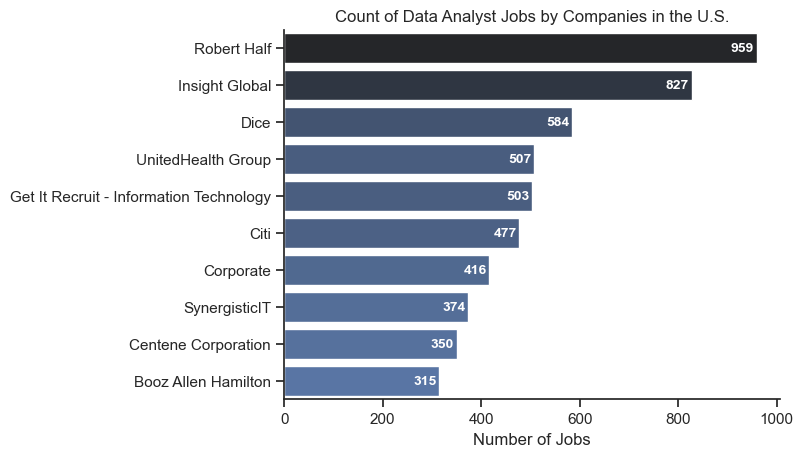

In [93]:
fig ,ax = plt.subplots()

sns.barplot(data = df_plot, x='count'  , y= 'company_name' , hue = 'count', palette='dark:b_r', legend='')
sns.despine() #-------------> removes top n right border around the plot
plt.title('Count of Data Analyst Jobs by Companies in the U.S.')
plt.xlabel('Number of Jobs')
plt.ylabel('')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',  # Text to annotate
                (p.get_width() - 5, p.get_y() + p.get_height() / 2),  # Position (adjusted slightly)
                ha='right', va='center', color='white', fontsize=10, fontweight='bold')
    
plt.show()